<a href="https://colab.research.google.com/github/sds4670/ML_PRACTICE/blob/main/telco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Classification



**Problem Statement:**
In the telecom sector, where customers choose from various providers for communication and internet services, the challenge lies in retaining them. Service quality significantly influences customer perception, with even a brief maintenance break causing anxiety, highlighting our often-overlooked reliance on these services. Coupled with high customer acquisition costs, analyzing churn becomes critical. Churn rate, reflecting customer subscription cancellations, directly impacts revenue. Insights from churn analysis guide companies in formulating targeted strategies, improving service quality, and cultivating customer trust. Building predictive models and generating comprehensive churn analysis reports are imperative for sustained business growth.

# Aim :
The objective is to categorize potential churn customers by leveraging both numerical and categorical features. This entails addressing a binary classification problem within the framework of a dataset exhibiting imbalances.

## Dataset Attributes

The [dataset](https://github.com/virajbhutada/Telecom-Customer-Churn-Prediction-ML-PowerBI/blob/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv) encompasses diverse attributes providing valuable insights into customer details and interactions. Customer-specific details include a unique identifier (**customerID**), gender information, and a binary indicator denoting whether the customer is a senior citizen (**SeniorCitizen**).

Additional attributes capture relational aspects, such as whether the customer has a partner (**Partner**) and dependents (**Dependents**). The **tenure** attribute signifies the duration, in months, for which the customer has been associated with the company.

Communication services are represented by attributes like **PhoneService** and **MultipleLines**, indicating the presence of phone service and whether the customer has multiple lines. Internet-related features encompass the **InternetService** provider, online security (**OnlineSecurity**), online backup (**OnlineBackup**), device protection (**DeviceProtection**), and tech support (**TechSupport**).

Entertainment services are reflected in attributes like streaming TV (**StreamingTV**) and streaming movies (**StreamingMovies**). The **Contract** attribute reveals the duration of the customer's contract, with options such as month-to-month, one year, and two years.

Billing preferences are outlined through the **PaperlessBilling** attribute, indicating whether the customer opts for paperless billing. The **PaymentMethod** attribute specifies how customers choose to pay, with options like electronic check, mailed check, bank transfer (automatic), and credit card (automatic).

Financial details include the **MonthlyCharges** the customer incurs on a monthly basis and the overall **TotalCharges** accumulated.

Lastly, the critical attribute of **Churn** denotes whether the customer has churned, serving as a crucial factor in understanding customer retention dynamics.

### Importing Essential Libraries

To proceed with the analysis, we need to import the essential libraries. These libraries provide the necessary tools and functions to manipulate, visualize, and analyze the dataset effectively. The following libraries will be imported for this purpose.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


No null values present in the data!

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


The dataset exhibits numerous features with text data, most likely representing categorical features. Notably, the **Total Charges** feature contains numerical values but is currently stored as a string datatype. As a first step, we will convert the entries in this column into floating-point numbers for further analysis.

In [ ]:
#Converting DataFrame column elements from string to float using the following code line :

#data['TotalCharges'] = data['TotalCharges'].astype(float)

# Identify non-convertible values
non_convertible_values = data[data['TotalCharges'] == ' ']['TotalCharges']

# Print unique non-convertible values
print("Non-convertible values:", non_convertible_values.unique())

# Replace ' ' with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Convert the column to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

# Drop rows with ' ' in 'TotalCharges'
data = data[data['TotalCharges'] != ' ']

# Convert the column to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

data.drop(columns = ['customerID'], inplace = True)

Non-convertible values: [' ']


During the conversion of the **TotalCharges** column to float, an error was encountered due to the presence of empty strings, preventing the direct conversion of string to float.

The issue arises because, though these elements were defined as strings, they did not appear as null values, and consequently, the missing values did not display anything. An example of this is a string variable defined as `a = ' '`.

To address this, we have decided to drop the **customerID** column. Furthermore, we will categorize the features into two groups: numerical and categorical. Additionally, we will perform label encoding transformations for the categorical features to facilitate further analysis.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


We will generate a deep copy of the original dataset to ensure that modifications made during label encoding do not affect the original dataset. This deep copy will serve as a version with all features converted into numerical values, facilitating visualization and modeling.

Subsequently, we will recompute the descriptive statistics of the data to provide a comprehensive overview of the transformed dataset.

In [ ]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2283.30,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.45,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3794.74,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


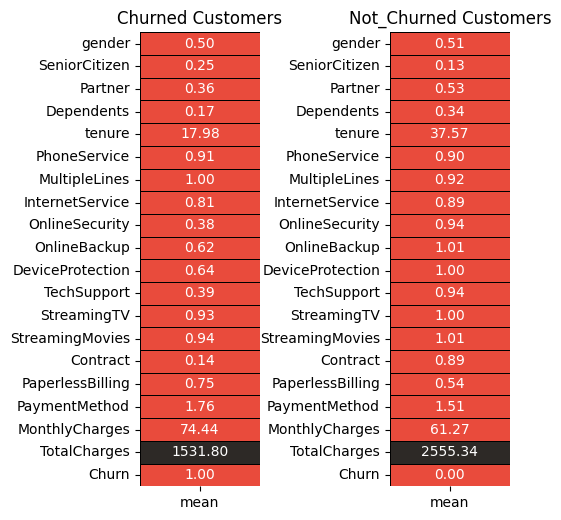

In [ ]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)


- **Mean Tenure:** Customers who churned had a lower mean tenure (17.98 months) compared to those who continued (37.57 months).

- **Online Services:** Features like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport have higher mean values for not-churned customers, indicating their potential role in customer retention.

- **Contract Duration:** Churned customer contracts are notably shorter than those of not-churned customers.

- **Monthly Charges:** Mean MonthlyCharges for churned customers (74.44) are higher than for not-churned customers (61.27).

- **Total Charges:** Not-churned customers have higher mean TotalCharges (2555.34) compared to churn customers (1531.80).

- **Categorical Features:** Due to numerous categorical features, mean values are concentrated around 0.

These insights highlight areas for potential focus in retaining customers and emphasize the importance of specific features in influencing customer churn. Further exploration in the EDA section will provide a more detailed analysis of these features.

# Exploratory Data Analysis (EDA)

In [ ]:
#Dividing features into Numerical and Categorical :

col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


In the context of this analysis, features are classified as categorical if they have less than 6 unique elements; otherwise, they are considered numerical. While an alternative approach is to use the datatype of the elements (e.g., integer for numerical and string for categorical), given the dataset's manageable size, a manual check is also feasible.

This dual approach ensures a robust classification of features into numerical and categorical, facilitating a comprehensive understanding of their nature and aiding subsequent analytical steps.

## Churn Target Variable Visualization

Understanding the distribution of the target variable, "Churn," is crucial for gaining insights into customer behavior. In this visualization:

- **Churn Distribution:** We explore the distribution of churned and not-churned customers to gauge the imbalance in the dataset.

- **Visual Representation:** Utilizing graphs or charts to present a clear and concise overview of the proportion of customers who churned and those who did not.

- **Insights:** Analyzing patterns in churn distribution can reveal potential challenges and opportunities in addressing customer retention.

This visualization serves as a foundational step in comprehending the dataset's target variable, setting the stage for more in-depth analyses and modeling.

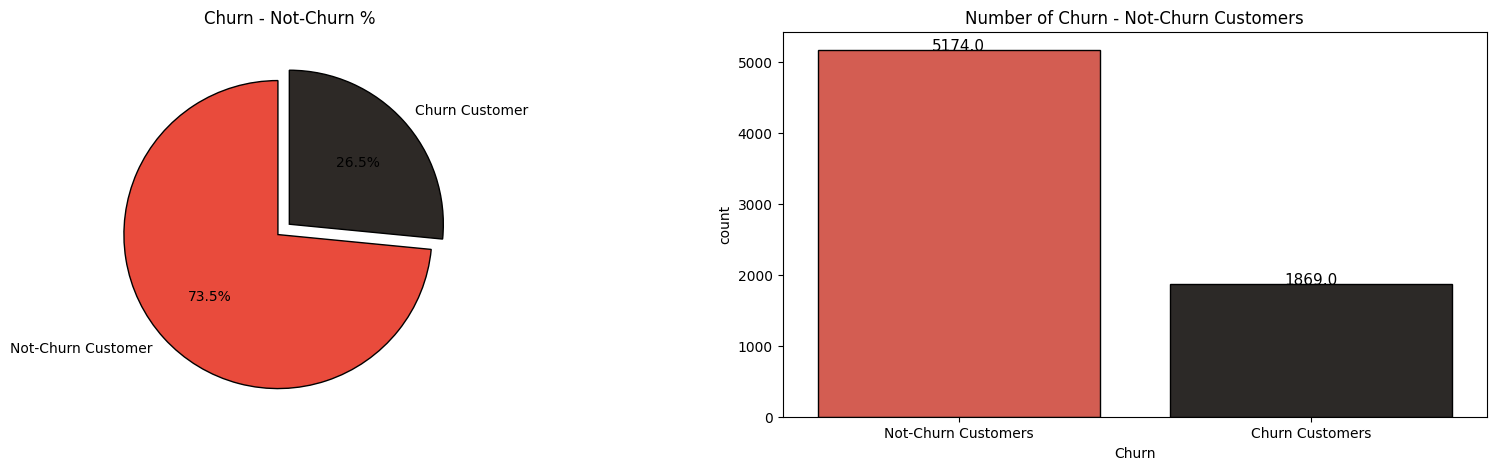

In [ ]:
colors = ['#E94B3C','#2D2926']
# Assuming 'Churn' is a categorical variable with values 'Yes' and 'No'

l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
axes[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
            colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Churn - Not-Churn %')

# Countplot
ax = sns.countplot(x='Churn', data=df1, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

ax.set_title('Number of Churn - Not-Churn Customers')

plt.show()


The dataset exhibits an imbalanced distribution, with a ratio of approximately 3:1 for Not-Churn to Churn customers. This imbalance introduces a bias in predictions, where the model may lean towards accurately predicting Not-Churn instances.

Visualizations will vividly illustrate this disparity, emphasizing the challenge posed by the skewed distribution in the dataset. Addressing this class imbalance will be a crucial consideration in subsequent modeling steps to ensure a more accurate and meaningful predictive outcome.

## Categorical Features and Their Impact on the Target Variable (Churn)

In [ ]:
categorical_features.remove('Churn')


For visualization purposes, we will exclude the target variable, "Churn," from the list of categorical features. This allows for a focused examination of how other categorical attributes influence the likelihood of customer churn.

In [ ]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

To manage the abundance of categorical features in the dataset, we classify them into three groups based on their values or column names. This categorization aids in organizing and analyzing the features more effectively, allowing for a structured exploration of their impact on the target variable.

## Group 1: Customer Information

This category encompasses attributes related to customer demographics and characteristics:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

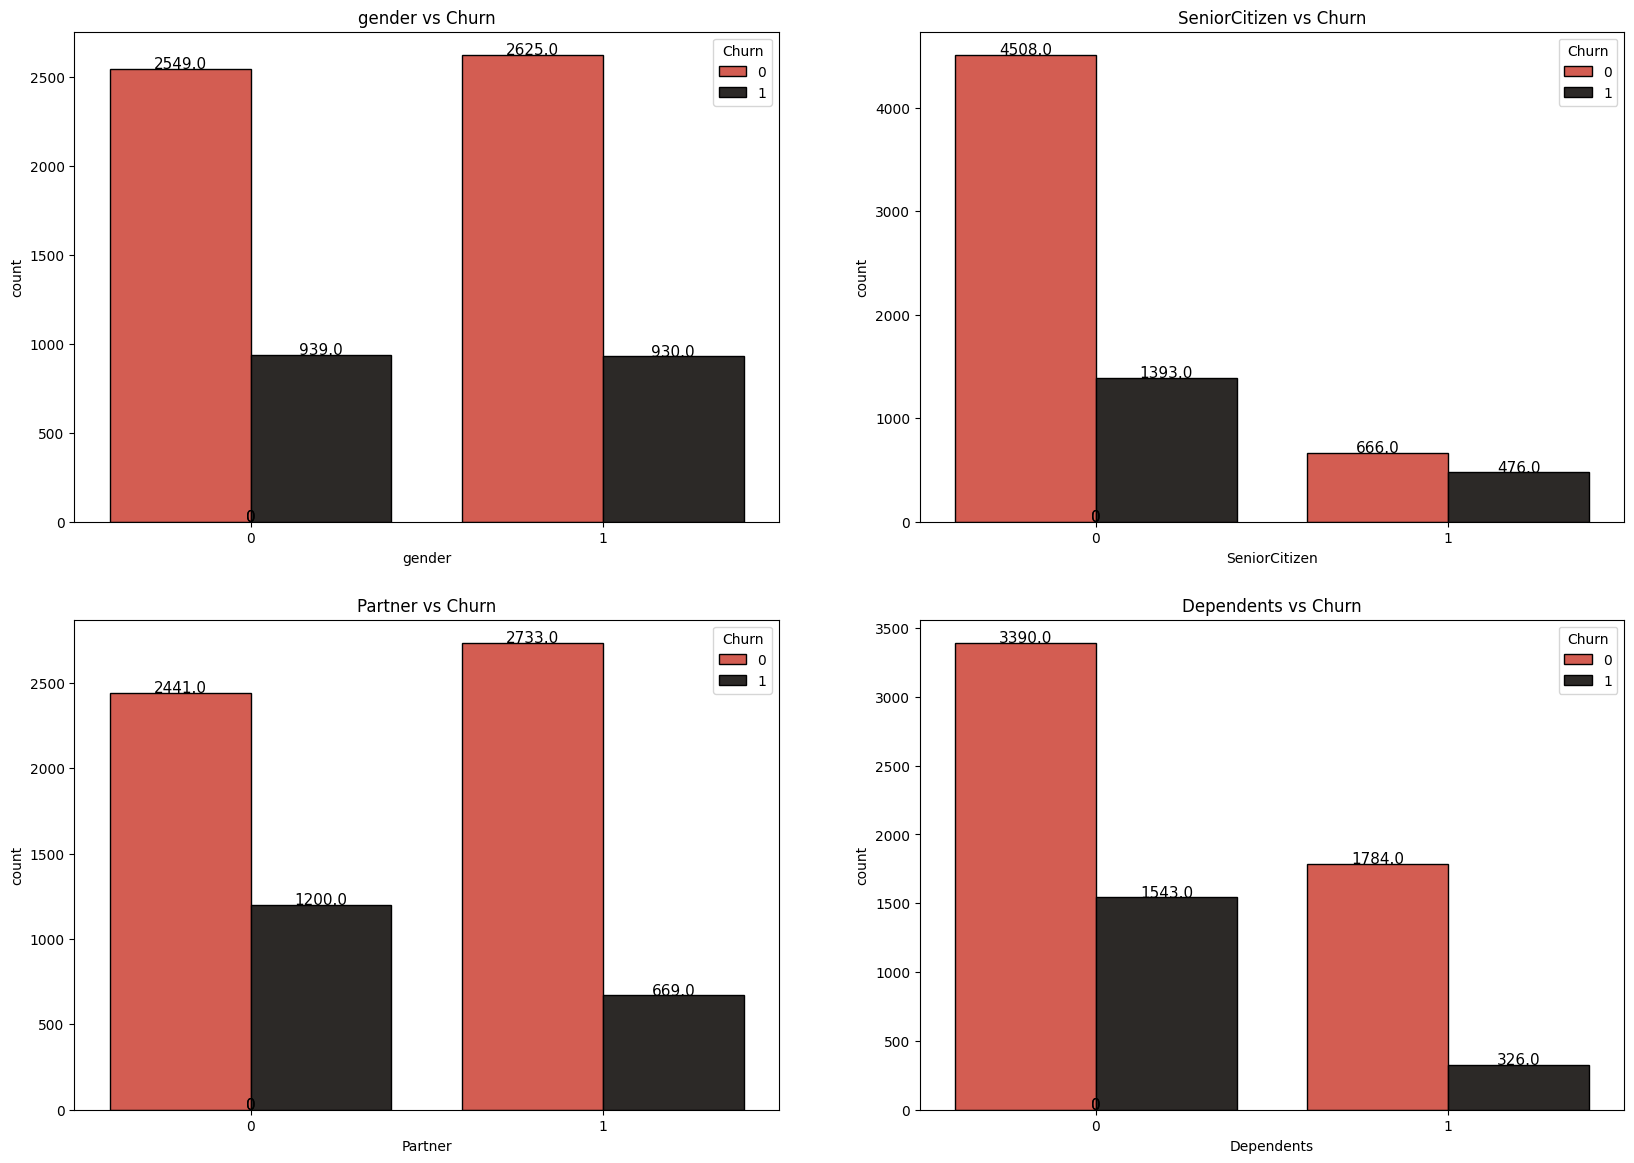

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

- **Gender Churn Analysis:**
  Customer churn rates are comparable between male and female customers, indicating similarity in churn behavior across genders.

- **SeniorCitizen Analysis:**
  The number of SeniorCitizen customers is relatively low. However, among SeniorCitizens, approximately 40% experienced churn, accounting for 476 out of 1142 Senior Citizen customers.

- **Partner Status Impact:**
  Customers residing with a partner exhibit lower churn rates compared to those without a partner.

- **Dependents Influence:**
  Churn rates are higher for customers without dependents, suggesting a potential correlation between familial status and customer retention.

These observations provide insights into specific customer segments that may require targeted retention strategies. Understanding the nuanced behavior within these groups can aid in developing more tailored approaches for customer retention.

## Group 2: Customer-Enlisted Services
For visualization purposes, we'll categorize features related to services subscribed by the customer into two groups:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This segmentation allows for a focused examination of customer behavior in terms of the services they have subscribed to, aiding in the identification of patterns and trends within these service-related attributes.

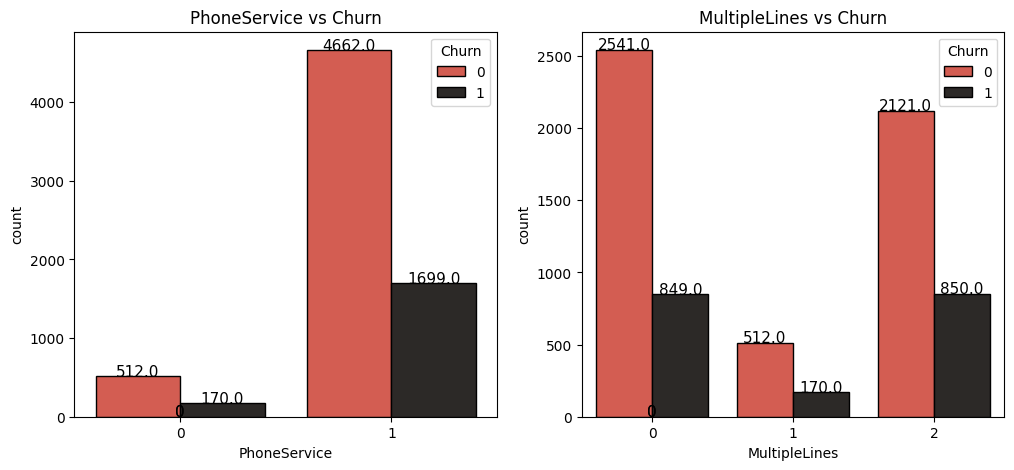

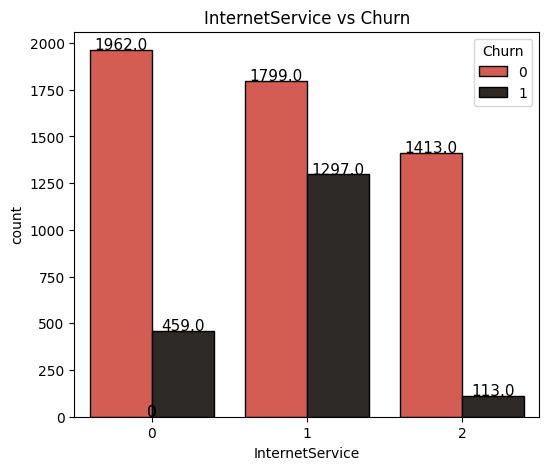

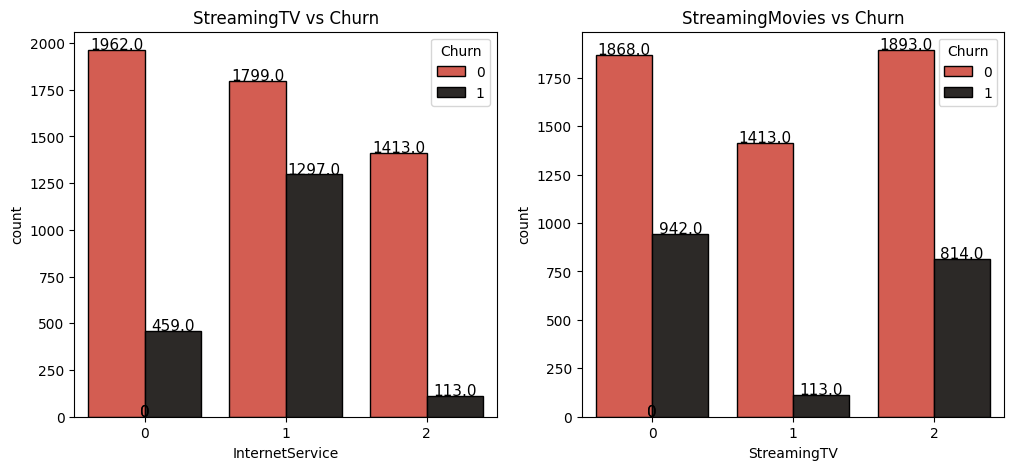

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title)

- **PhoneService Analysis:**
  Notably, a higher retention rate is observed among customers with no phone service compared to those who opted to discontinue the service.

- **MultipleLines Impact:**
  The churn rate appears consistent irrespective of whether customers have subscribed to multiple lines or not.

- **InternetService Preferences:**
  A considerable number of customers exhibit a preference against utilizing Fiber optic cables for InternetService. Conversely, the data suggests a greater inclination towards DSL among customers.

- **Insights on Streaming Services:**
  Both StreamingTV and StreamingMovies exhibit parallel churn patterns. Regardless of subscription status, a noteworthy number of customers have experienced churn. This implies that factors beyond streaming content alone contribute to customer disengagement.

These observations shed light on customer behavior concerning the services they avail, offering valuable insights for devising targeted strategies to enhance customer retention.

### Group 2: Customer-Enlisted Services

This category comprises features related to security and support services subscribed by the customer:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

Exploring these attributes will provide insights into how customers engage with security and support services, guiding the development of strategies to enhance customer satisfaction and retention.

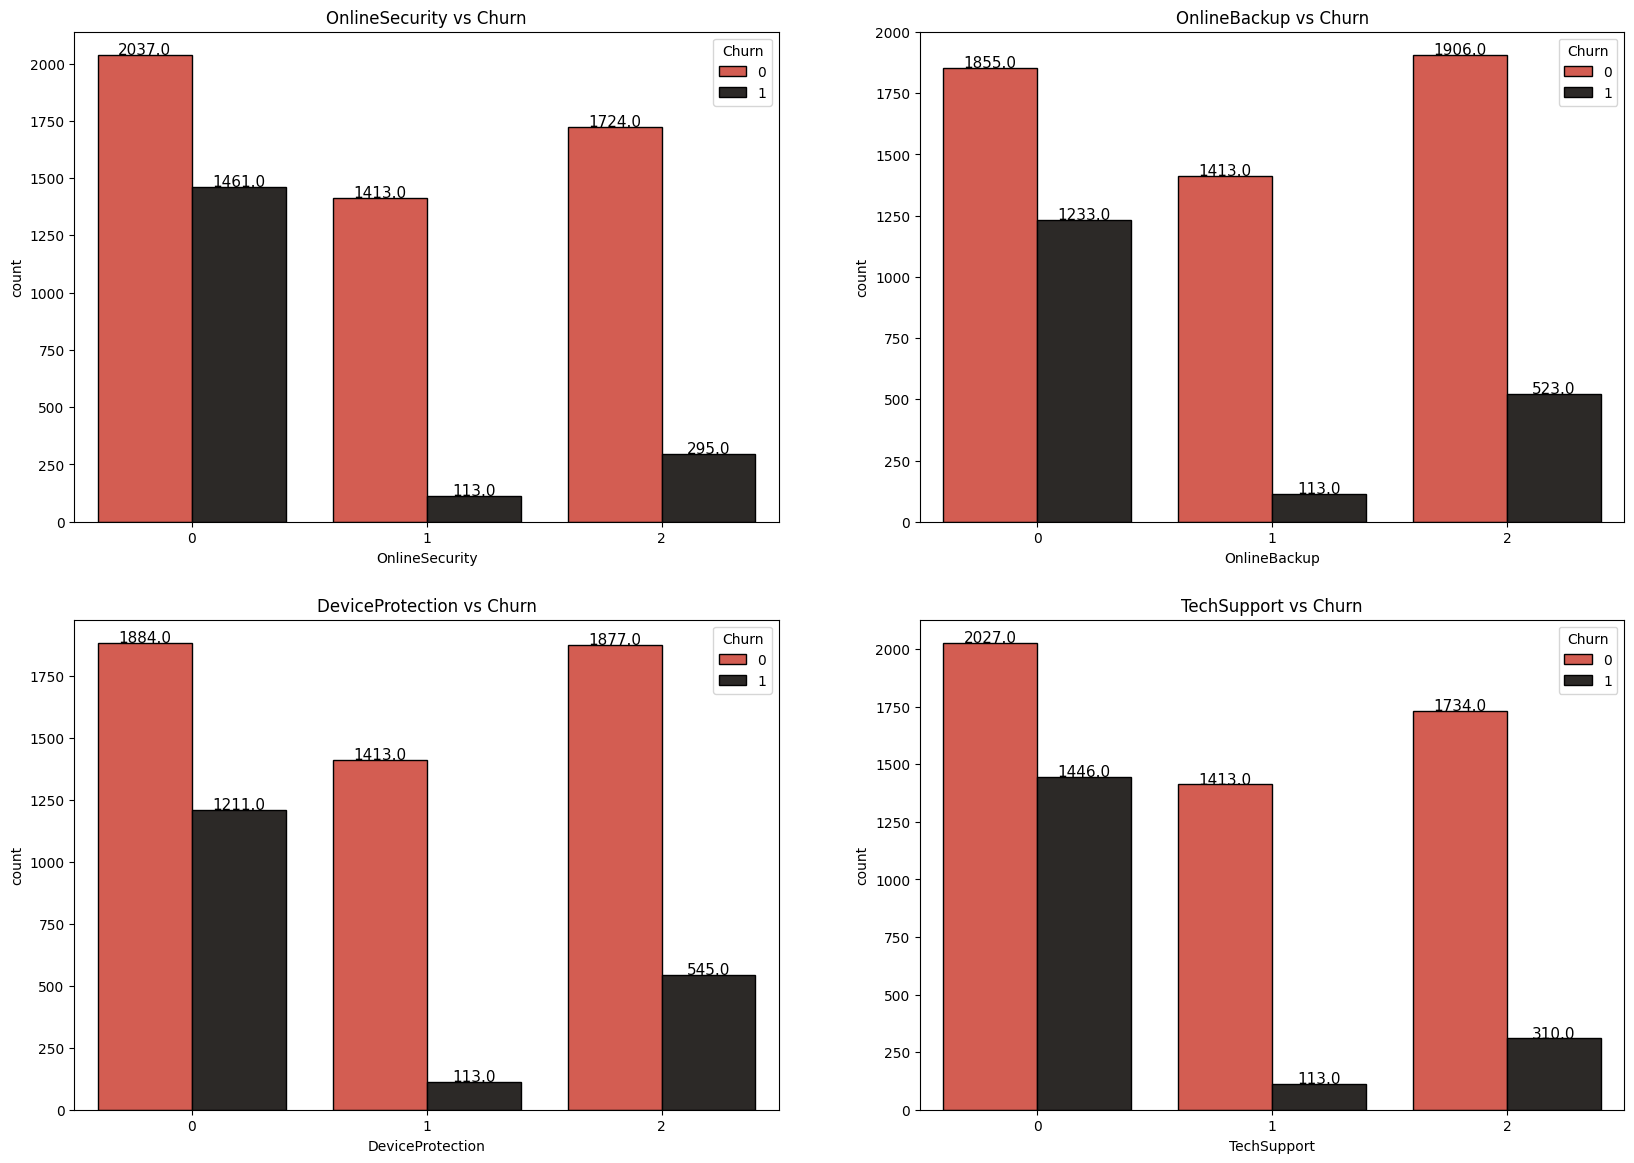

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

The visualizations indicate the critical importance of services related to OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport in retaining customers. A notable number of customers have opted to switch service providers, emphasizing the significance of providing robust and satisfactory services in these areas. These findings underscore the need for focused efforts in improving and promoting these services to enhance overall customer satisfaction and retention.

### Group 3

This group encompasses features related to contractual terms, billing preferences, and payment methods:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes will provide insights into customer preferences regarding contractual commitments, billing processes, and payment methods, guiding strategies for optimizing customer satisfaction and retention.

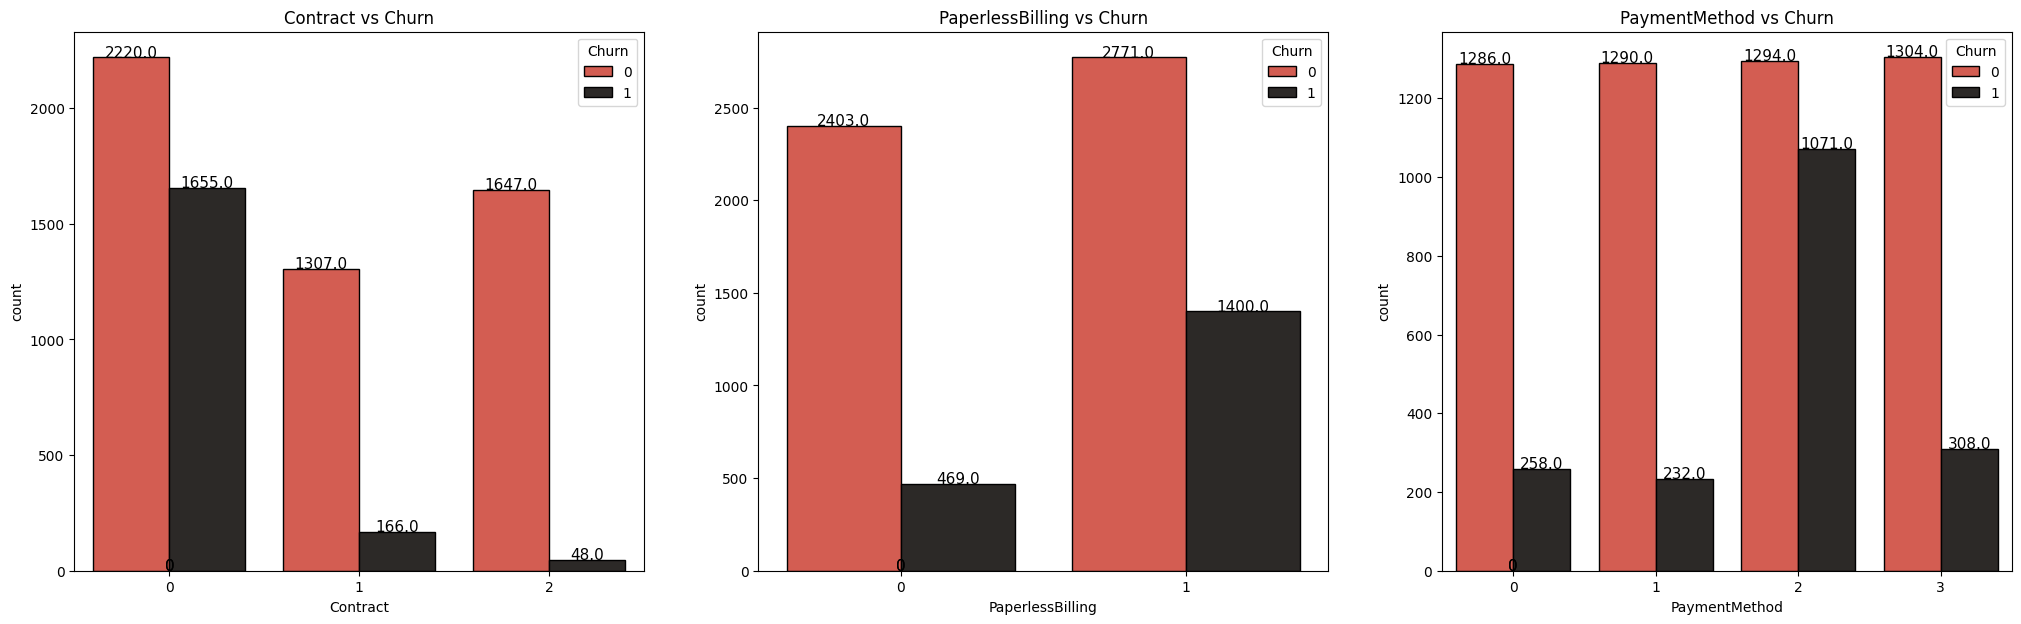

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- **Contract Analysis:**
  Customer churn is notably high for Month-to-Month contracts. This could be attributed to customers testing various services and opting for shorter-term commitments to explore available options or save costs.

- **PaperlessBilling Impact:**
  A considerable number of customers experience churn in the presence of PaperlessBilling, suggesting potential issues related to payment or receipt processes.

- **PaymentMethod Insights:**
  Customers exhibit a strong aversion to the Electronic check payment method. Of the 2365 bills paid using Electronic check, a significant 1071 customers chose to discontinue services. Addressing issues with Electronic check or reconsidering its inclusion may be necessary for improved customer satisfaction.

These observations underscore the importance of understanding customer preferences in contractual terms, billing methods, and payment processes. Implementing measures to address specific pain points can contribute significantly to customer retention efforts.

### Analysis of Categorical Features in Relation to Churn Cases

This investigation centers on examining the impact of categorical features specifically concerning customers who have experienced churn. The goal is to discern patterns, correlations, and influential factors among these categorical features within the context of churn cases. The findings from this analysis will provide valuable insights for optimizing strategies aimed at customer retention.


### Group 1: Customer Information

In this grouping, we explore the relationship between customer information and churn cases, focusing on the following categorical features:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

This analysis aims to uncover patterns and associations within these specific customer attributes concerning instances of customer churn.

In [ ]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

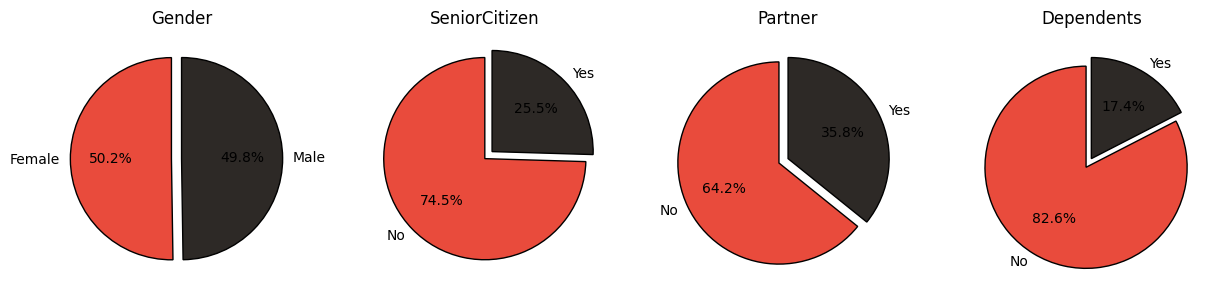

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- **Gender Analysis:**
  A distinct 50% - 50% split is observed between male and female customers who have switched services. This suggests that the reasons for switching are likely related to service quality or specific processes that elicited negative reactions from customers.

- **SeniorCitizen Impact:**
  A substantial 75% of churned customers are not classified as SeniorCitizens. This highlights a critical area where the company should focus its attention for customer retention strategies.

- **Living Arrangements Influence:**
  Customers living independently, without partners or dependents, have prominently discontinued services. The data indicates that, on average, 73.4% of customers who churned were living independently.

These insights provide a targeted understanding of how specific customer information attributes relate to instances of churn. Addressing these aspects can contribute significantly to the development of effective customer retention initiatives.

### Group 2: Customer-Enlisted Services

In this grouping, we investigate the relationship between services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This analysis aims to uncover patterns and correlations within these specific service-related attributes concerning cases of customer churn.

In [ ]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

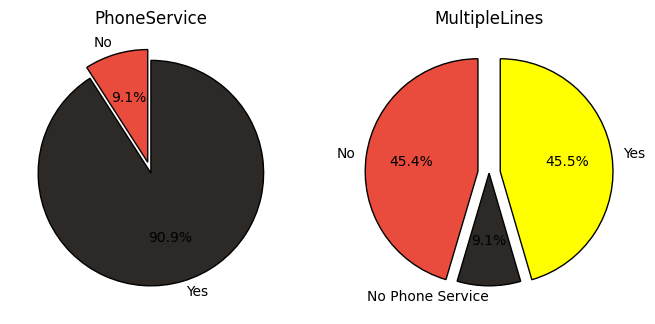

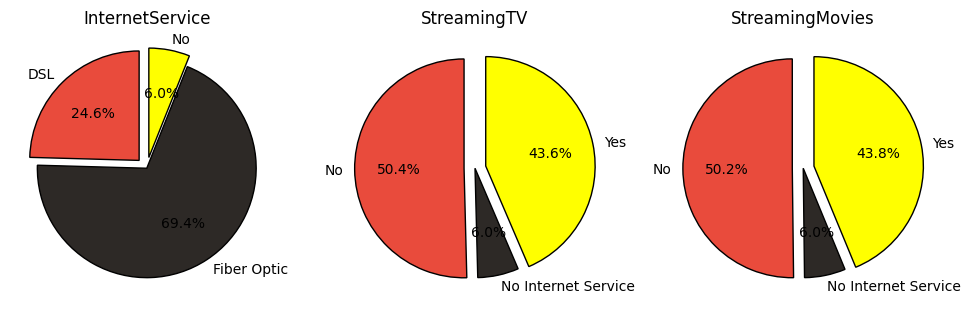

In [ ]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');


- **PhoneService Impact:**
  Despite the provision of PhoneService, a significant percentage of customers switched, suggesting dissatisfaction or other service-related issues.

- **MultipleLines Influence:**
  The availability of MultipleLines did not significantly affect customer unsubscription, indicating its limited impact on churn.

- **InternetService Preferences:**
  A notable 70% of customers opted out from services involving Fiber Optic cables for InternetService, signaling a strong preference against this technology.

- **Streaming Services Insights:**
  While customers without StreamingTV and StreamingMovies services tended to cancel their subscriptions, an average of 43.7% of customers with these services switched. This suggests that other factors beyond streaming content contribute to customer churn.

### Group 2: Customer-Enlisted Services
In this grouping, we investigate the relationship between security and support services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

This analysis aims to uncover patterns and correlations within these specific security and support service-related attributes concerning cases of customer churn.

In [ ]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes

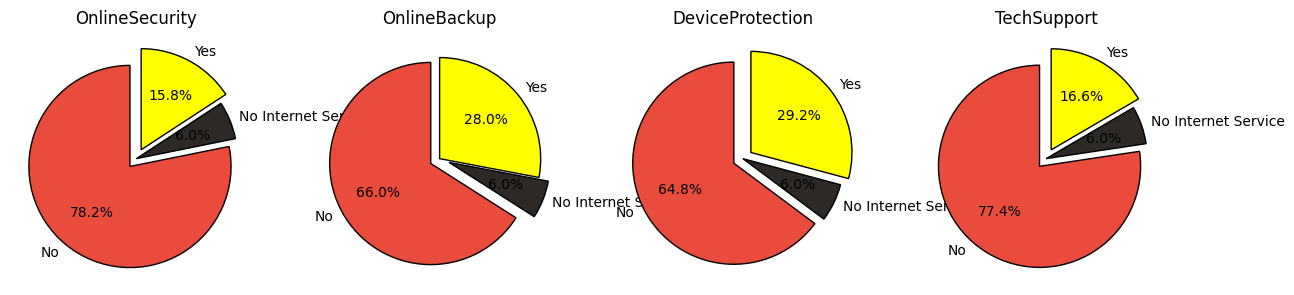

In [ ]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');


The pie charts above underscore the critical importance of providing OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport services. On average, a substantial 71.6% of customers terminated their services due to the absence of these essential features. This highlights a clear correlation between the provision of robust security and support services and customer retention, emphasizing the need for strategic enhancements in these areas.

### Group 3

This grouping delves into the relationship between contract terms, billing preferences, and payment methods selected by the customer, specifically in the context of instances of churn. The categorical features under scrutiny are:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes aims to reveal patterns and correlations within these specific contractual and financial service-related features concerning cases of customer churn.

In [ ]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100,
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100]
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

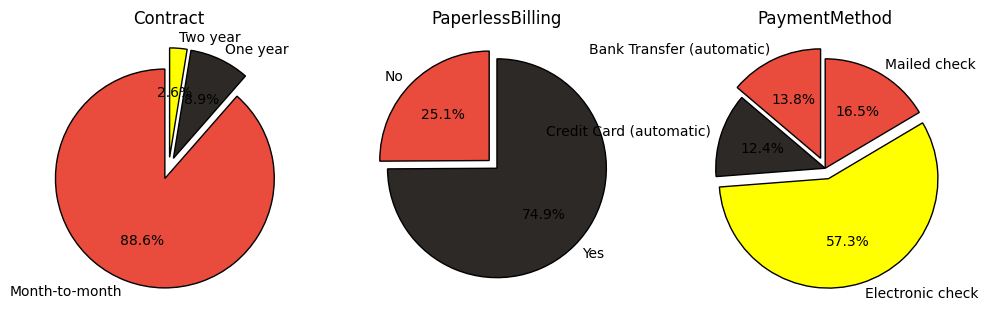

In [ ]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');


- **Contract Duration Impact:**
  Monthly contracts dominate customer churn, with a substantial 88.6% share. This highlights the need to explore alternatives or incentives for longer-term commitments.

- **PaperlessBilling Analysis:**
  PaperlessBilling does not garner positive sentiment among customers, evident from the significant churn associated with this billing method.

- **PaymentMethod Insights:**
  Electronic check emerges as a significant concern, contributing to 57.3% of churn. Addressing issues with this payment method is crucial. Mailed check, Bank Transfer (automatic), and Credit Card (automatic) follow, necessitating attention to improve the overall payment experience for customers.

These findings provide actionable insights for refining contract terms, billing preferences, and payment methods to enhance customer satisfaction and retention.

## Numerical Features Distribution
In this analysis, we explore the distribution of numerical features to gain insights into the spread and characteristics of quantitative attributes in the dataset.

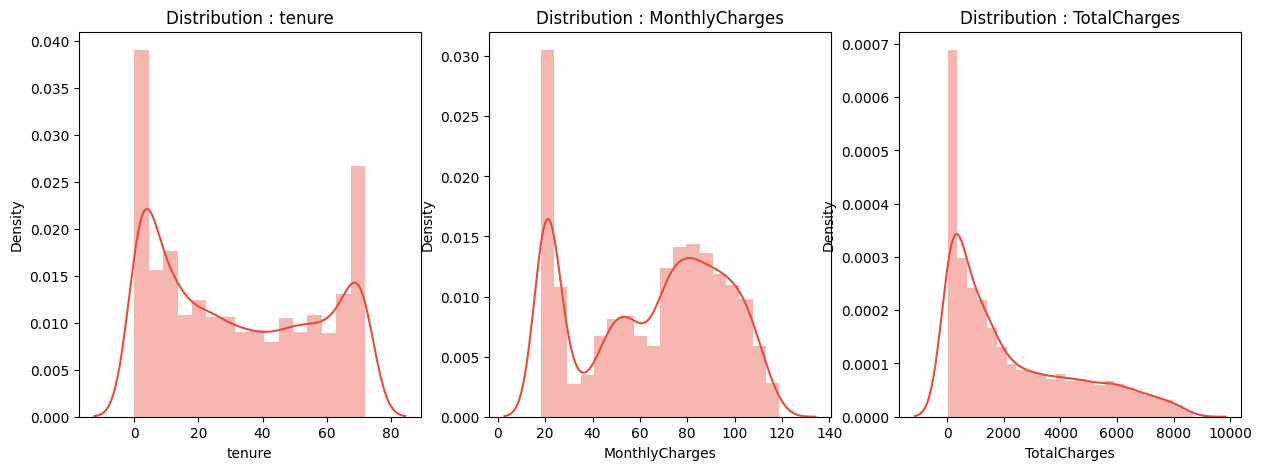

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **Tenure Distribution:**
  The tenure distribution exhibits a bimodal pattern with peaks at 0-70, indicating the presence of two distinct groups within the customer base.

- **MonthlyCharges Distribution:**
  MonthlyCharges create a bimodal distribution with peaks at 20-80, suggesting the existence of two prevalent cost structures or service tiers.

- **TotalCharges Distribution:**
  TotalCharges displays a positively or rightly skewed distribution, indicating a concentration of lower values with a gradual tapering towards higher values.

These numerical feature distributions provide valuable insights into the varied patterns within customer tenure, monthly charges, and total charges. Understanding these distributions aids in refining strategies for customer segmentation and engagement.

## Target Variable (Outcome) in Relation to Numerical Features

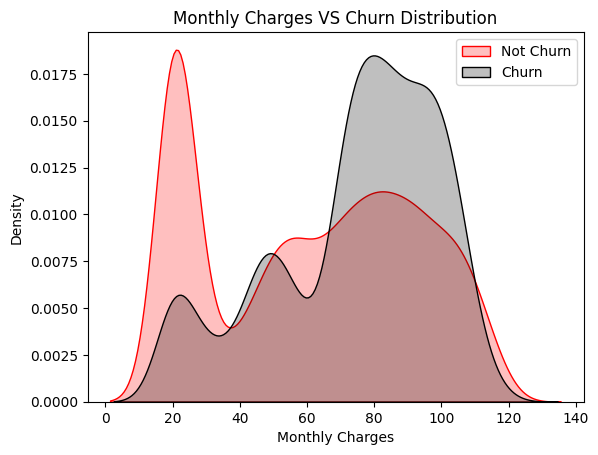

In [ ]:
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

Customers are more likely to churn due to the presence of high monthly charges.

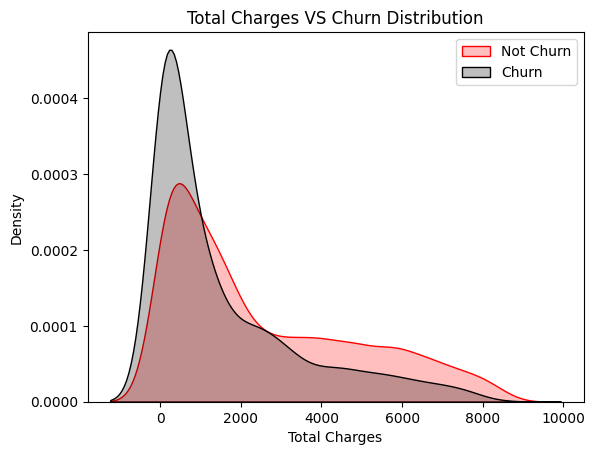

In [ ]:
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0) ],
                color="red", shade = True);
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                ax =ax, color="black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

The observation that high Total Charges are associated with a higher likelihood of customer churn suggests a potential issue with the pricing system. Addressing and optimizing the pricing structure is crucial to mitigate this factor contributing to customer churn. A thorough examination and potential adjustments in pricing strategies may help enhance customer satisfaction and retention.

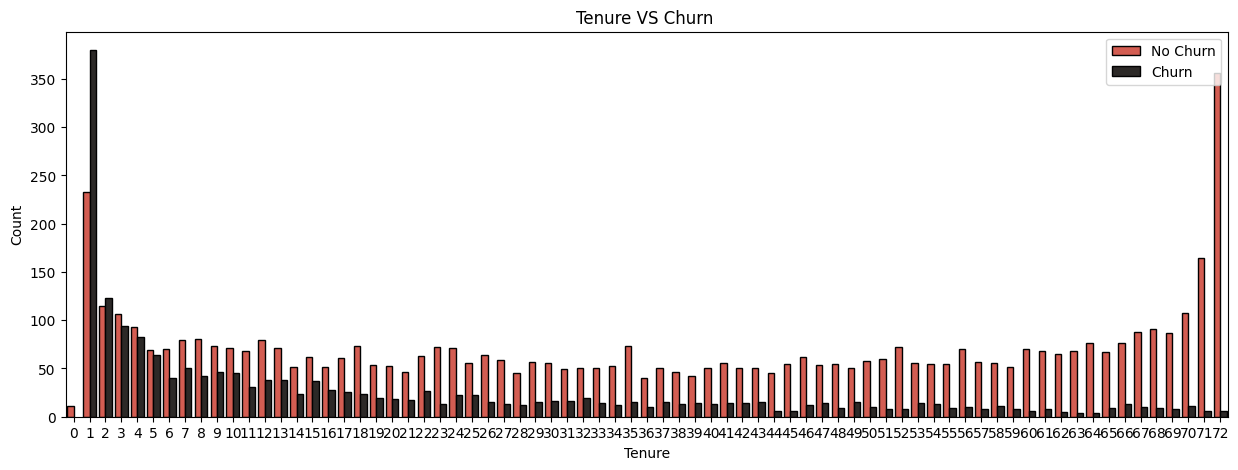

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x='tenure', data=df1, hue='Churn', palette = colors, edgecolor='black')
plt.title('Tenure VS Churn ')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.show()

- **Tenure Analysis:**
  A substantial number of customers exit within the first month, with high cancellations continuing for 4-5 months. However, churn numbers decrease as tenure increases. The graph exhibits a symmetrical pattern, with the left side dominated by high churn numbers and the right side characterized by lower churn numbers. This highlights a correlation between longer customer tenure and reduced likelihood of churn. Understanding and leveraging this trend can inform strategies to enhance customer retention over time.

## Quantitative features vs. Quantitative features with respect to the Target Variable (Churn)

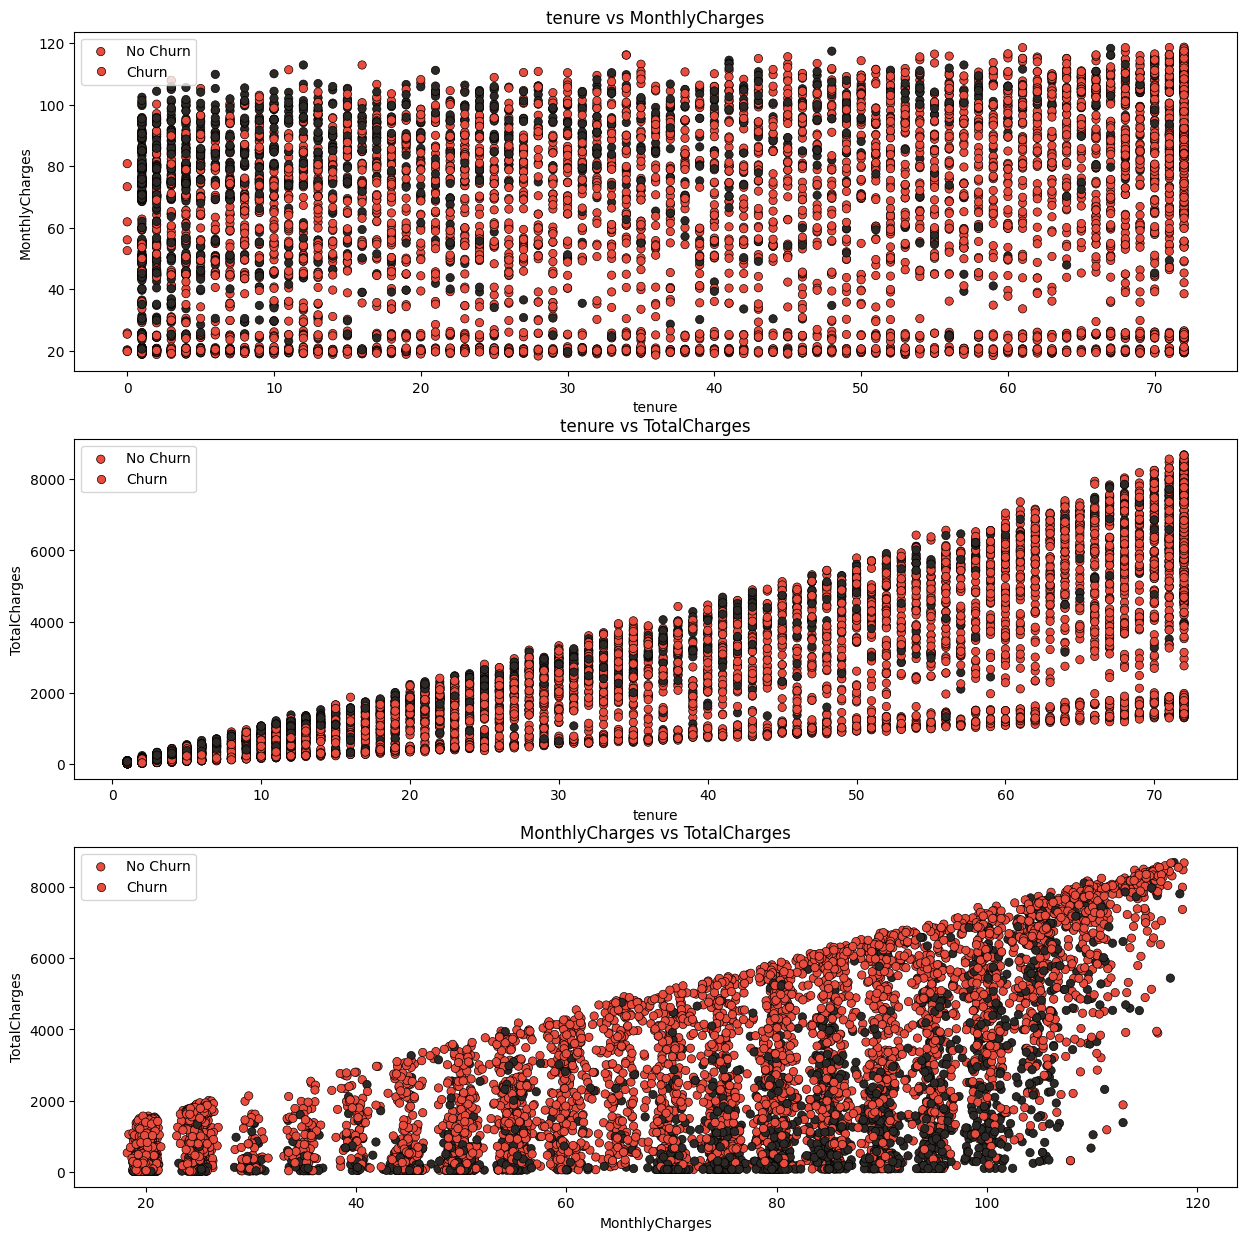

In [ ]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- **Tenure and MonthlyCharges Relationship:**
  - For tenure within the 0-20 months period, customer churn occurs across various MonthlyCharges values.
  - From 20-60 months tenure, customers with higher MonthlyCharges values (70-120) exhibit an increased likelihood of dropping out.

- **TotalCharges vs Tenure:**
  - As tenure increases, TotalCharges also increase, indicating a positive correlation.
  - Customers opting out are typically those charged the highest within their tenure period, along with some in the middle range.

- **MonthlyCharges Threshold:**
  - Customers tend to decide to cancel their subscriptions when MonthlyCharges reach 70 and above.

These insights emphasize the nuanced relationships between tenure, MonthlyCharges, and TotalCharges, providing valuable information for optimizing pricing strategies and customer retention efforts.

# Overview of Exploratory Data Analysis

In customer churn analysis, certain categorical features reveal distinct hierarchies crucial for targeted retention strategies. **Male** customers are more likely to churn than females, while **SeniorCitizens** exhibit lower churn rates. Not having a **partner** or **dependents** increases churn likelihood. Regarding services, having **phone service** and **multiple lines** correlates with lower churn, and **fiber optic** internet users are more prone to churn than DSL users. The absence of online security, online backup, etc., indicates higher churn.

Contract-wise, **month-to-month** contracts show higher churn than one-year and two-year contracts. **PaperlessBilling** customers are more likely to churn. In payment methods, **electronic checks** users have a higher churn risk, followed by mailed checks, bank transfers (automatic), and credit cards (automatic). Understanding these hierarchies is essential for devising effective retention strategies.

# Variable Enhancement (FE)

## Addressing Data Imbalance with SMOTE:

In managing imbalanced datasets, two fundamental strategies come into consideration:

1. **Downsampling (Undersampling):** Reducing the prevalence of the majority class by trimming down its samples.
   
2. **Upsampling (Oversampling):** Augmenting the representation of the minority class by increasing its samples to align with the majority.

Following a thorough exploration of both undersampling and oversampling methodologies, the decision has been reached to opt for oversampling.

To achieve optimal data balance, we will employ the imbalanced-learn (imblearn) library.

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

In [ ]:
cols = list(df1.columns)
cols.remove('Churn')

x = df1.loc[:,cols]
y = df1.loc[:,'Churn']


imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

over = SMOTE(sampling_strategy = 1)

x1,y1 = over.fit_resample(x,y)
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y1))



Class distribution before SMOTE: Counter({0: 5174, 1: 1869})
Class distribution after SMOTE: Counter({0: 5174, 1: 5174})


## Addressing Data Leakage:

Data Leakage poses a significant challenge when external information beyond the training dataset influences model creation—an issue often overlooked.

To foster the development of robust models, mitigating data leakage becomes imperative. The prevalent occurrence of overly optimistic models, rendered practically useless for production, underscores the urgency of this matter.

To safeguard against Data Leakage, a prudent approach involves employing a train-test-split prior to any transformations. This ensures that transformations are applied based on the training data, maintaining integrity for both training and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 2)


## Visualizing Correlation Matrix:

To generate a correlation matrix visualization, a new dataframe is constructed, incorporating values solely from x_train and y_train.

This deliberate exclusion of external data ensures the preservation of data integrity within the training set, thereby mitigating the risk of data leakage.


In [ ]:
# Creating a DataFrame from x_train
x_train_df = pd.DataFrame(x_train, columns=cols)

# Creating a DataFrame for y_train
y_train_df = pd.DataFrame({'Churn': y_train})

# Concatenate x_train_df and y_train_df along columns
x_train_test = pd.concat([x_train_df, y_train_df], axis=1)

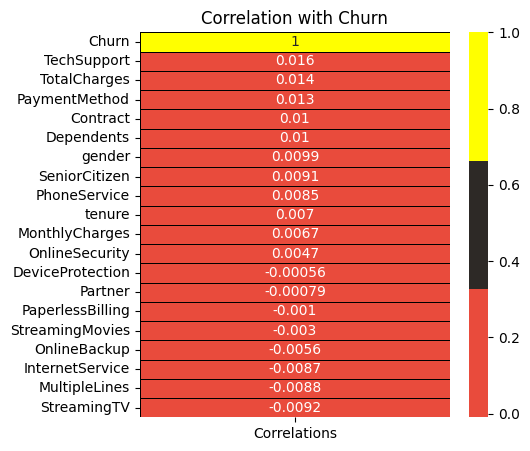

In [ ]:
# Calculate correlation matrix
corr = x_train_test.corr()['Churn'].sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.show()

## Correlation Analysis Results:

Upon scrutinizing the correlation matrix, it is evident that "MulipleLines," "PhoneService," "gender," "StreamingTV," "StreamingMovies," and "InternetService" exhibit negligible correlation coefficients. As a strategic decision, these features are deemed non-contributory and are slated for removal.

Conversely, the remaining features showcase noteworthy correlation patterns, either positively or negatively. This discernment guides our feature selection strategy, emphasizing those variables that exhibit meaningful correlations in further analyses.

# Categorical Feature Selection Strategy:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

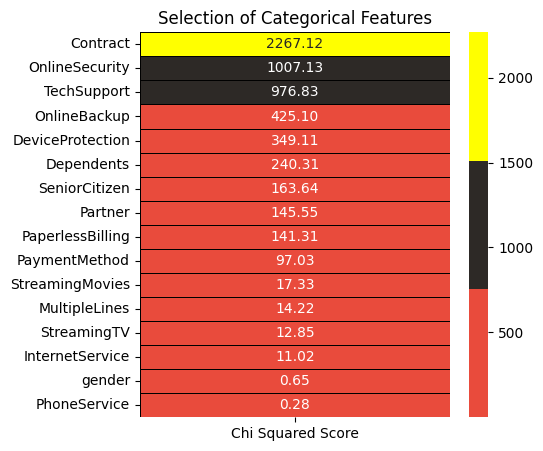

In [ ]:
#Chi-Squared Test :

features = x_train_df.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

## Low-Relevance Categorical Features:

Following a thorough analysis, it is observed that the categorical features "PhoneService," "gender," "StreamingTV," "StreamingMovies," "MultipleLines," and "InternetService" demonstrate a notably low association with the target variable "Churn."

Considering this, a judicious decision has been made to exclude these features from the modeling process. This feature elimination aims to enhance model efficiency and accuracy by focusing on the categorical variables that exhibit a more substantial relation to the prediction of churn.

# Numerical Feature Selection Approach:

In [ ]:
from sklearn.feature_selection import f_classif

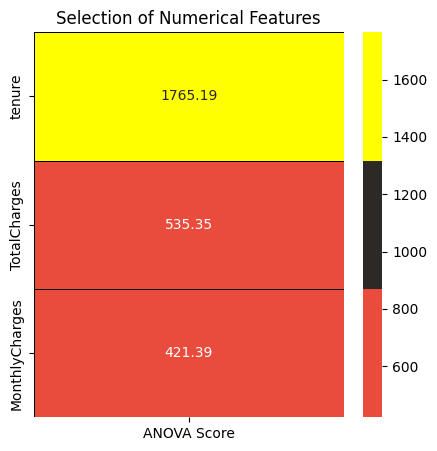

In [ ]:
#ANOVA Test :

from sklearn.feature_selection import f_classif

features = x_train_df.loc[:,numerical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

## ANOVA Test Results for Numerical Features:

Following the ANOVA test, it is observed that higher ANOVA scores indicate greater importance of a feature in relation to the target variable. Based on the obtained results, it is determined that all numerical features possess noteworthy ANOVA scores.

Consequently, the decision has been made to retain all numerical features for the modeling process. This inclusion is grounded in the understanding that each numerical feature, as indicated by its ANOVA score, contributes significantly to the predictive capabilities of the model. This comprehensive approach aims to capture the collective influence of all relevant numerical features on the target variable.

In [ ]:
x_train=x_train_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])
x_test_df = pd.DataFrame(x_test, columns=cols)
x_test=x_test_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])


## Data Scaling for Machine Learning Models:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()  # Min-Max Scaling
ss = StandardScaler()  # Standardization

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

x_train[columns_to_scale] = mms.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = mms.transform(x_test[columns_to_scale])



In machine learning, ensuring uniformity in the interpretation of feature values is crucial. The two primary methods for data scaling are Normalization and Standardization. The choice between them depends on the distribution of the data.

1. **Normalization:**
   - Applied to features with non-normally distributed data.
   - Features like tenure, MonthlyCharges, and TotalCharges exhibit a right-skewed and bimodal data distribution, making normalization suitable.
   - Normalization brings these features to a common scale, facilitating fair comparisons across different ranges.

2. **Standardization:**
   - Typically used for features that display a normal (Gaussian) distribution.
   - In the current dataset, none of the features undergo standardization.
   - Standardization becomes relevant when feature values are on vastly different scales, ensuring that they contribute equally to model training.

In summary, the choice between normalization and standardization is driven by the distribution of the data. Normalization is applied to features with non-normal distributions, while standardization is reserved for normally distributed features with significant scale differences. This thoughtful approach aims to enhance the model's understanding of the features and their relative importance.

## Feature Selection & Data Splitting for Modeling:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve



Utilizing selected features identified through tests, split the data into 80-20 train-test sets. Train the model on the training set and evaluate its performance on the test set. This ensures a robust and effective machine learning model.

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)

    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)

    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))



def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    plt.figure(figsize=(4,3))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')


    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## Xgboost Classifier :

Optimizing Predictions: Leveraging the Power of XGBoost Classification

Accuracy is : 0.8565217391304348
Cross Validation Score :  93.86%
ROC_AUC Score :  85.65%
--------------------------------------------------------------------------------


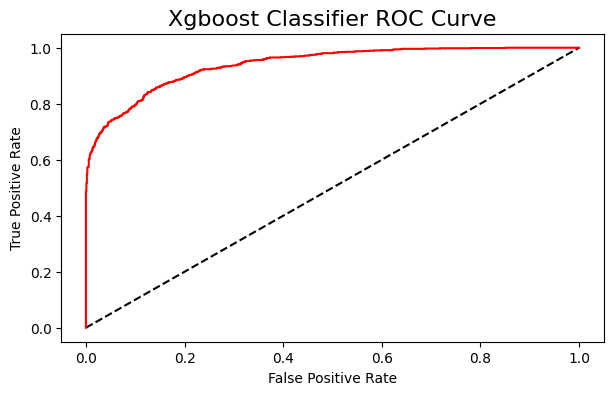

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1040
           1       0.85      0.86      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



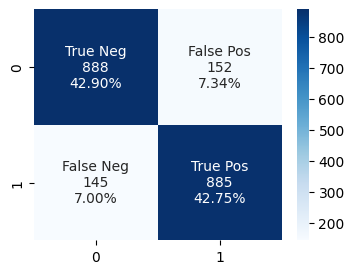

In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Xgboost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xgboost Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_xgb,x_test,y_test)

## Random Forest Classifier :
Ensemble Excellence: Enhancing Predictive Accuracy with Random Forest Classification

Accuracy is : 0.8106280193236715
Cross Validation Score :  89.83%
ROC_AUC Score :  81.09%
--------------------------------------------------------------------------------


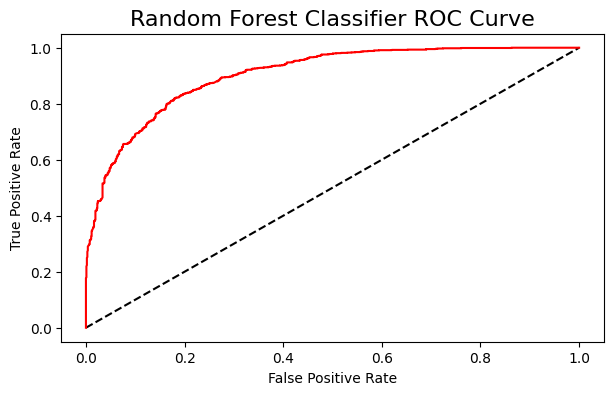

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1040
           1       0.78      0.87      0.82      1030

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



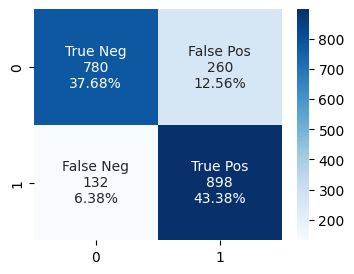

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)

## Decision Tree Classifier :
Decision-Making Precision: Unraveling Patterns with Decision Tree Classification

Accuracy is : 0.7884057971014493
Cross Validation Score :  85.95%
ROC_AUC Score :  78.85%
--------------------------------------------------------------------------------


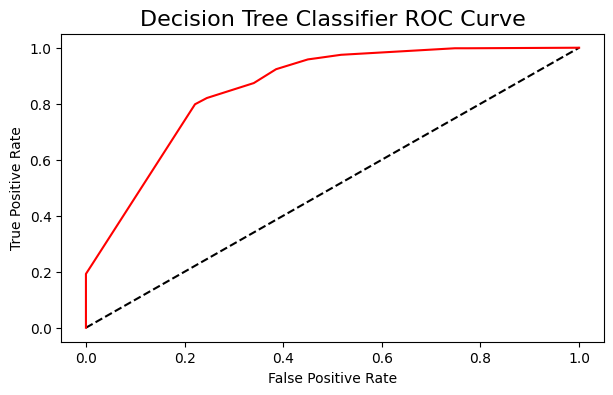

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1040
           1       0.78      0.80      0.79      1030

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



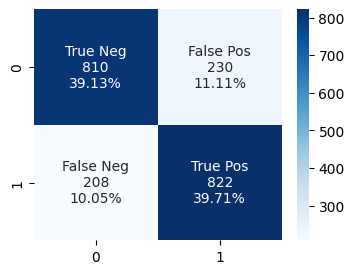

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)

## Logistic Regression Classifier
Linear Elegance: Modeling Predictive Relationships with Logistic Regression

Accuracy is : 0.7743961352657005
Cross Validation Score :  84.64%
ROC_AUC Score :  77.46%
--------------------------------------------------------------------------------


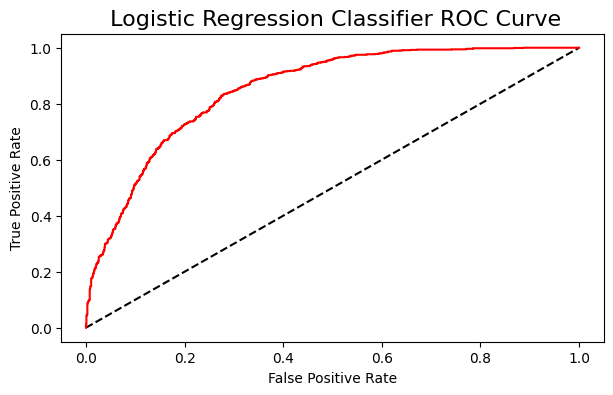

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1040
           1       0.75      0.82      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



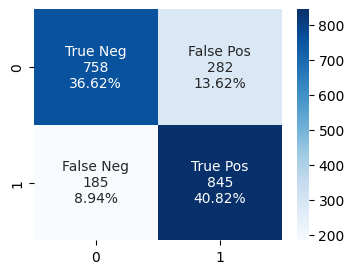

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)

# Algorithm Results Table
Quantifying Success: Comprehensive Results Table for Machine Learning Algorithms

In [ ]:
data = {
    'ML Algorithm': ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [85.70, 81.01, 79.46, 77.43],
    'Cross Validation Score': [93.84, 89.91, 86.07, 84.70],
    'ROC AUC Score': [85.70, 81.04, 79.48, 77.46],
    'F1 Score (Churn)': [86, 82, 80, 78]
}

results_df = pd.DataFrame(data)
results_df


,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,XGBClassifier,85.70,93.84,85.70,86
1,RandomForestClassifier,81.01,89.91,81.04,82
2,DecisionTreeClassifier,79.46,86.07,79.48,80
3,LogisticRegressionClassifier,77.43,84.70,77.46,78


# Approaches to Diminish Customer Churn and Amplify Revenue

**Strategic Recommendations for Telco Company**:

1. **Targeted Customer Segmentation:**
   - Focus on three key customer segments: SeniorCitizen, those living with a Partner, and individuals living alone.

2. **SeniorCitizen Strategy:**
   - Acknowledge that SeniorCitizen customers are willing to pay a premium. Provide high-quality services tailored to their needs.

3. **Affordable Entry Point:**
   - Establish an affordable and accessible entry point for new customers. Prioritize services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport in the first 6 months to secure a strong foundation.

4. **Streaming Services Optimization:**
   - Make StreamingTV and StreamingMovies affordable for all customer segments. Target diverse content preferences and streamline the payment process.

5. **Payment Method Optimization:**
   - Discontinue Electronic check for payments due to high churn. Focus on Bank Transfer (automatic) and Credit Card (automatic). Address the challenge of reducing the median churn tenure for these methods.

6. **PaperlessBilling Consideration:**
   - Recognize the cost implications of PaperlessBilling with a starting point of 60. Explore more economical alternatives starting at 20 in MonthlyCharges.

7. **Cost Sensitivity at 70 Mark:**
   - Acknowledge customer sensitivity when MonthlyCharges for any single service hit 70. Emphasize service quality as the unique selling proposition (USP) to retain customers.

8. **Revenue and Value Enhancement:**
   - Implement these strategic measures to not only boost revenue but also enhance the overall value delivery process for customers.

These recommendations aim to tailor services, optimize pricing, and streamline payment methods to cater to specific customer needs and drive sustained business growth.

## Conclusion

- **Real-World Business Insights:**
  This dataset provides a valuable glimpse into real-world business challenges, offering an opportunity to leverage Data Science techniques for effective solutions.

- **EDA for System Evaluation:**
  Insights derived from Exploratory Data Analysis (EDA) prove invaluable for gauging the efficacy of existing systems. They serve as a foundation for strategic planning, enabling the formulation of measures for problem mitigation and continuous improvement.

- **Data Balancing Techniques:**
  The implementation of Synthetic Minority Over-sampling Technique (SMOTE) for data balancing showcases its utility. While undersampling was explored, achieving optimal F1 Score (Churn) in the 60-70% range remained elusive. Other data balancing methods warrant consideration for future enhancements.

- **Model Performance Enhancement:**
  Feature creation through combination was experimented with, but it failed to surpass the performance of existing models. Hyperparameter tuning and outlier detection emerge as potential avenues for elevating F1 Score (Churn) and Cross Validation Score in future iterations.

This comprehensive analysis not only sheds light on current business intricacies but also lays the groundwork for continuous refinement and advancement in addressing customer churn challenges.